# Stock Market Prediction And Forecasting Using Stacked LSTM

## LGM  - Data Science Intern

***Author*** : Rammya Dharshini K

***Date*** : 10.08.2021

## Task - 2 : Beginner Level

Data Collection

In [1]:
import pandas_datareader as pdr
key="2f501b0434120151882652d52c5df515cffe5c09"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-19 00:00:00+00:00,109.36,109.69,108.36,108.770,25368072,25.635929,25.713286,25.401511,25.497622,101472288,0.0,1.0
1,AAPL,2016-08-22 00:00:00+00:00,108.51,109.10,107.85,108.860,25820230,25.436673,25.574980,25.281958,25.518720,103280920,0.0,1.0
2,AAPL,2016-08-23 00:00:00+00:00,108.85,109.32,108.53,108.590,21257669,25.516376,25.626552,25.441362,25.455427,85030676,0.0,1.0
3,AAPL,2016-08-24 00:00:00+00:00,108.03,108.75,107.68,108.565,23675081,25.324153,25.492934,25.242107,25.449566,94700324,0.0,1.0
4,AAPL,2016-08-25 00:00:00+00:00,107.57,107.88,106.68,107.390,25086248,25.216321,25.288990,25.007689,25.174126,100344992,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-08-11 00:00:00+00:00,145.86,146.7200,145.53,146.050,48493463,145.86,146.7200,145.53,146.050,48493463,0.0,1.0
1253,AAPL,2021-08-12 00:00:00+00:00,148.89,149.0500,145.84,146.190,73779113,148.89,149.0500,145.84,146.190,73779113,0.0,1.0
1254,AAPL,2021-08-13 00:00:00+00:00,149.10,149.4444,148.27,148.970,58846293,149.10,149.4444,148.27,148.970,58846293,0.0,1.0
1255,AAPL,2021-08-16 00:00:00+00:00,151.12,151.1900,146.47,148.535,103558782,151.12,151.1900,146.47,148.535,103558782,0.0,1.0
1256,AAPL,2021-08-17 00:00:00+00:00,150.19,151.6800,149.09,150.230,92229735,150.19,151.6800,149.09,150.230,92229735,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       109.36
1       108.51
2       108.85
3       108.03
4       107.57
         ...  
1252    145.86
1253    148.89
1254    149.10
1255    151.12
1256    150.19
Name: close, Length: 1257, dtype: float64

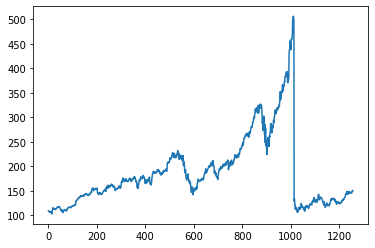

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       109.36
1       108.51
2       108.85
3       108.03
4       107.57
         ...  
1252    145.86
1253    148.89
1254    149.10
1255    151.12
1256    150.19
Name: close, Length: 1257, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.01546059]
 [0.0133512 ]
 [0.01419496]
 ...
 [0.1140808 ]
 [0.11909371]
 [0.11678579]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 440)

In [17]:
train_data

array([[0.01546059],
       [0.0133512 ],
       [0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.0267024 ],
       [0.02712428],
       [0.03206274],
       [0.03268314],
       [0.03526405],
       [0.03437066],
       [0.03598372],
       [0.03578519],
       [0.03558666],
       [0.03471809],
       [0.03456919],
       [0.03342764],
       [0.03603335],
       [0.03752233],
       [0.030

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 313ms/step - loss: 0.0098 - val_loss: 0.0420
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0024 - val_loss: 0.0274
Epoch 3/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0014 - val_loss: 0.0244
Epoch 4/100
12/12 [==============================] - 2s 195ms/step - loss: 8.3574e-04 - val_loss: 0.0214
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 5.2063e-04 - val_loss: 0.0221
Epoch 6/100
12/12 [==============================] - 2s 193ms/step - loss: 5.1071e-04 - val_loss: 0.0220
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 4.9010e-04 - val_loss: 0.0214
Epoch 8/100
12/12 [==============================] - 2s 194ms/step - loss: 4.6067e-04 - val_loss: 0.0206
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 4.3815e-04 - val_loss: 0.0204
Epoch 10/100
12/12 [==============================] - 2s 197ms/step

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.6.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

177.49007460817978

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

216.61436755921895

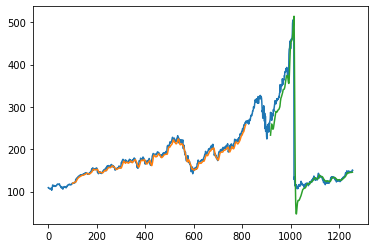

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340480444709184,
 0.059484812388326425,
 0.0589884852094501,
 0.05886440341473104,
 0.054968235060551984,
 0.053305539011316294,
 0.05248659916617038,
 0.05442

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: ignored

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)